# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ipywidgets as widgets
warnings.filterwarnings('ignore')
%matplotlib inline

# IMPORTING DATASET

In [2]:
df=pd.read_csv(R"C:\Users\niveditiha\Desktop\Grab SG Restaurants.csv")

# DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_source         16136 non-null  object 
 1   name              16130 non-null  object 
 2   address           16136 non-null  object 
 3   country           16136 non-null  object 
 4   cuisine           16134 non-null  object 
 5   currency          16117 non-null  object 
 6   delivery_cost     16085 non-null  float64
 7   lat               16136 non-null  float64
 8   lon               16136 non-null  float64
 9   opening_hours     16136 non-null  object 
 10  image_url         16125 non-null  object 
 11  radius            16136 non-null  int64  
 12  rating            14004 non-null  float64
 13  reviews_nr        13602 non-null  float64
 14  delivery_options  16136 non-null  object 
 15  promo             8777 non-null   object 
 16  loc_type          16136 non-null  object

In [4]:
df.isnull().sum()

id_source              0
name                   6
address                0
country                0
cuisine                2
currency              19
delivery_cost         51
lat                    0
lon                    0
opening_hours          0
image_url             11
radius                 0
rating              2132
reviews_nr          2534
delivery_options       0
promo               7359
loc_type               0
delivery_by            0
delivery_time        183
dtype: int64

In [5]:
df.dropna(subset=['name'], inplace=True)

In [6]:
df['cuisine'].dropna(inplace=True)

In [7]:
df['cuisine'].unique()

array(['["Western", "Fast Food", "Halal", "Chicken", "Beverages"]',
       '["Healthy", "Sandwiches", "Fast Food", "Halal", "Western"]',
       '["Same Prices In-Store", "Beverages", "Local", "Bubble Tea"]',
       ..., '["Chicken", "Korean", "Fried Chicken"]',
       '["Asian", "Bakery & Cake", "Breakfast & Brunch", "Singaporean"]',
       '["Japanese", "Noodles", "Grill"]'], dtype=object)

In [8]:
df['cuisine'].value_counts()

["Chinese"]                                                189
["Asian", "Chinese"]                                       175
["Local", "Chinese"]                                       135
["Western"]                                                134
["Local"]                                                  120
                                                          ... 
["Chinese", "Seafood", "Fast Food"]                          1
["Steak", "Western", "Ramen", "Islandwide Delivery"]         1
["Beverages", "Dessert", "Durian"]                           1
["Asian", "BBQ", "Fried Chicken", "Malaysian", "Snack"]      1
["Japanese", "Noodles", "Grill"]                             1
Name: cuisine, Length: 7488, dtype: int64

<AxesSubplot:xlabel='cuisine'>

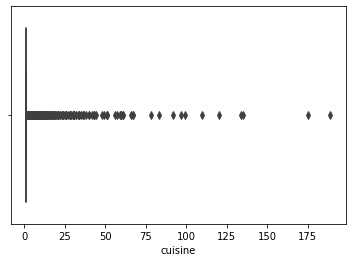

In [9]:
sns.boxplot(df['cuisine'].value_counts())

In [10]:
df['cuisine'].fillna('Chinese',inplace=True)

In [11]:
df['currency'].fillna('SGD',inplace=True)

<AxesSubplot:xlabel='delivery_cost'>

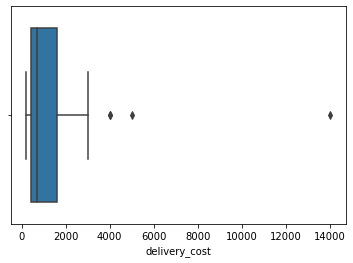

In [12]:
sns.boxplot(df['delivery_cost'])

In [13]:
df['delivery_cost'].fillna(df['delivery_cost'].mean(),inplace=True)

In [14]:
df.drop(['loc_type', 'delivery_by', 'delivery_time','radius','image_url','opening_hours','promo','lat','lon'], axis=1, inplace=True)

<AxesSubplot:xlabel='rating'>

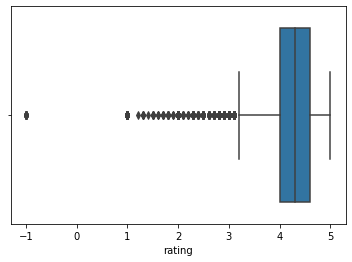

In [15]:
sns.boxplot(df['rating'])

In [16]:
df['rating'].fillna(df['rating'].median(),inplace=True)

<AxesSubplot:xlabel='reviews_nr'>

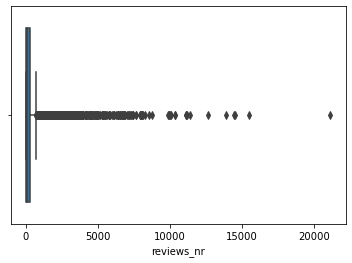

In [17]:
sns.boxplot(df['reviews_nr'])

In [18]:
df['reviews_nr'].fillna(df['reviews_nr'].median(),inplace=True)

df.info()

In [19]:
df.head()

,id_source,name,address,country,cuisine,currency,delivery_cost,rating,reviews_nr,delivery_options
0,SGDD01085,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",SGD,570.0,3.8,1591.0,ONLY_DELIVERY
1,4-CYTDLPUJEP53N6,Subway,Subway - Vivocity,Singapore,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",SGD,570.0,4.2,197.0,ONLY_DELIVERY
2,SGDD05605,LiHO Tea,LiHO Tea - Vivo City,Singapore,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",SGD,560.0,4.5,353.0,DELIVERY_TAKEAWAY
3,SGDD07548,Wingstop,Wingstop - VivoCity,Singapore,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",SGD,560.0,4.4,1391.0,ONLY_DELIVERY
4,4-CY2ZLZLTT2EDJ2,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,Singapore,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",SGD,570.0,4.6,309.0,DELIVERY_TAKEAWAY


# CREATING A SAMPLE WITH ONLY 30 ROWS AND DISPLAYING THE GRAPH

In [20]:
#we are creating a sample with only 30 rows so that we can properly display our graph
df_sample = df.iloc[:30] 

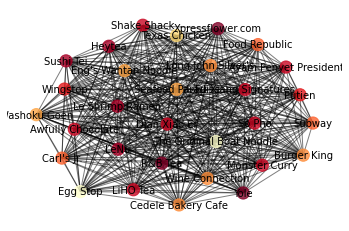

In [21]:
# Create a new empty graph
G = nx.Graph()

# Add vertices (nodes) to the graph for each restaurant name
for restaurant in df_sample['name']:
    G.add_node(restaurant)

# Add edges to the graph for each pair of restaurants with a higher rating than a threshold
rating_threshold = 1.0
for i, r1 in df_sample.iterrows():
    for j, r2 in df_sample.iterrows():
        if i < j and r1['rating'] > rating_threshold and r2['rating'] > rating_threshold:
            G.add_edge(r1['name'], r2['name'], weight=r1['rating'])

# Calculate the layout of the graph using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw the nodes of the graph using circles of different colors based on rating
node_color = [r['rating'] for i, r in df_sample.iterrows()]
cmap = plt.cm.get_cmap('YlOrRd')
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=150, alpha=0.8, cmap=cmap)

# Draw the edges of the graph using solid lines of varying thickness based on weight

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='k')

# Draw the labels of the graph
node_labels = dict(zip(list(G.nodes()), list(G.nodes())))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Set the axis off and display the plot
plt.axis('off')
plt.show()


# CREATING A SAMPLE WITH ONLY 300 ROWS AND DISPLAYING THE GRAPH

In [22]:
df_sample = df.iloc[:300] 

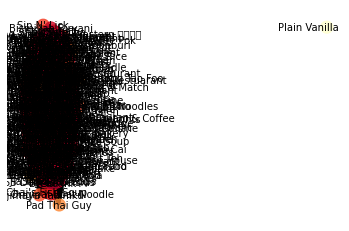

In [23]:
# Create a new empty graph
G = nx.Graph()

# Add vertices (nodes) to the graph for each restaurant name
for restaurant in df_sample['name']:
    G.add_node(restaurant)

# Add edges to the graph for each pair of restaurants with a higher rating than a threshold
rating_threshold = 1.0
for i, r1 in df_sample.iterrows():
    for j, r2 in df_sample.iterrows():
        if i < j and r1['rating'] > rating_threshold and r2['rating'] > rating_threshold:
            G.add_edge(r1['name'], r2['name'], weight=r1['rating'])

# Calculate the layout of the graph using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw the nodes of the graph using circles of different colors based on rating
node_color = [r['rating'] for i, r in df_sample.iterrows()]
cmap = plt.cm.get_cmap('YlOrRd')
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=150, alpha=0.8, cmap=cmap)

# Draw the edges of the graph using solid lines of varying thickness based on weight
edge_width = [d['weight'] for (u, v, d) in G.edges(data=True)]
edge_color = 'gray'
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='k')

# Draw the labels of the graph
node_labels = dict(zip(list(G.nodes()), list(G.nodes())))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Set the axis off and display the plot
plt.axis('off')
plt.show()


# BUILDING THE RECCOMENDATION ENGINE FOR RESTAURANTS BASED ON RATING

In [25]:
# Define a function that generates recommendations for the selected restaurant
def generate_recommendations(selected_restaurant):
    # Get the neighbors of the selected restaurant
    neighbors = list(G.neighbors(selected_restaurant))

    # Sort the neighbors by weight (rating)
    sorted_neighbors = sorted(neighbors, key=lambda x: G[selected_restaurant][x]['weight'], reverse=True)

    # Return the top 5 recommendations
    return sorted_neighbors[:5]

# Create a dropdown widget with restaurant names as options
restaurant_options = list(G.nodes())
restaurant_dropdown = widgets.Dropdown(options=restaurant_options)

# Define a function that updates the recommendations based on the selected restaurant
def update_recommendations(change):
    selected_restaurant = change['new']
    recommendations = generate_recommendations(selected_restaurant)
    print(f"Restaurants similar to {selected_restaurant}:")
    for i, recommendation in enumerate(recommendations):
        print(f"{i+1}. {recommendation}")

# Register the function as a callback for when the dropdown value changes
restaurant_dropdown.observe(update_recommendations, names='value')

# Display the dropdown widget
display(restaurant_dropdown)

Dropdown(options=('Texas Chicken', 'Subway', 'LiHO Tea', 'Wingstop', 'Le Shrimp Ramen', 'Heytea', 'Burger King…

Restaurants similar to LeNu:
1. R&B Tea
2. Le Shrimp Ramen
3. Heytea
4. Ayam Penyet President
5. Eng's Wantan Noodle
Restaurants similar to Washoku Goen:
1. R&B Tea
2. Yole
3. Le Shrimp Ramen
4. Heytea
5. LeNu
Restaurants similar to Potato Corner:
1. R&B Tea
2. Yole
3. Xpressflower.com
4. Le Shrimp Ramen
5. Heytea
Restaurants similar to Pizzakaya:
1. Beyond Coffee
2. Tamago-En
3. innisfree
4. Lush
5. Da Paolo Gastronomia
Restaurants similar to Mrs Pho:
1. Beyond Coffee
2. Tamago-En
3. innisfree
4. Rive Gauche
5. Lush
